In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/smalvar/CalculadoraAluguel-Novembro/main/banco_final.csv')

In [3]:
dados = dados.drop(['Unnamed: 0', 'endereco', 'bairro', 'rua'], axis=1)

In [4]:
dados.head()

,aluguel,quartos,banheiro,vaga,area,zona
0,3400,2.0,2.0,1.0,130,Oeste
1,3400,2.0,2.0,2.0,88,Oeste
2,5400,2.0,2.0,1.0,72,Oeste
3,2600,2.0,2.0,1.0,91,Oeste
4,3800,1.0,1.0,1.0,44,Oeste


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(dados, test_size=0.25, random_state=2,stratify=dados['zona'])

In [7]:
train.head()

,aluguel,quartos,banheiro,vaga,area,zona
975,950,1.0,1.0,0.0,37,Centro
776,3300,3.0,1.0,2.0,173,Leste
791,1100,1.0,1.0,0.0,40,Leste
407,3000,3.0,3.0,1.0,90,Sul
650,1500,2.0,1.0,0.0,100,Sul


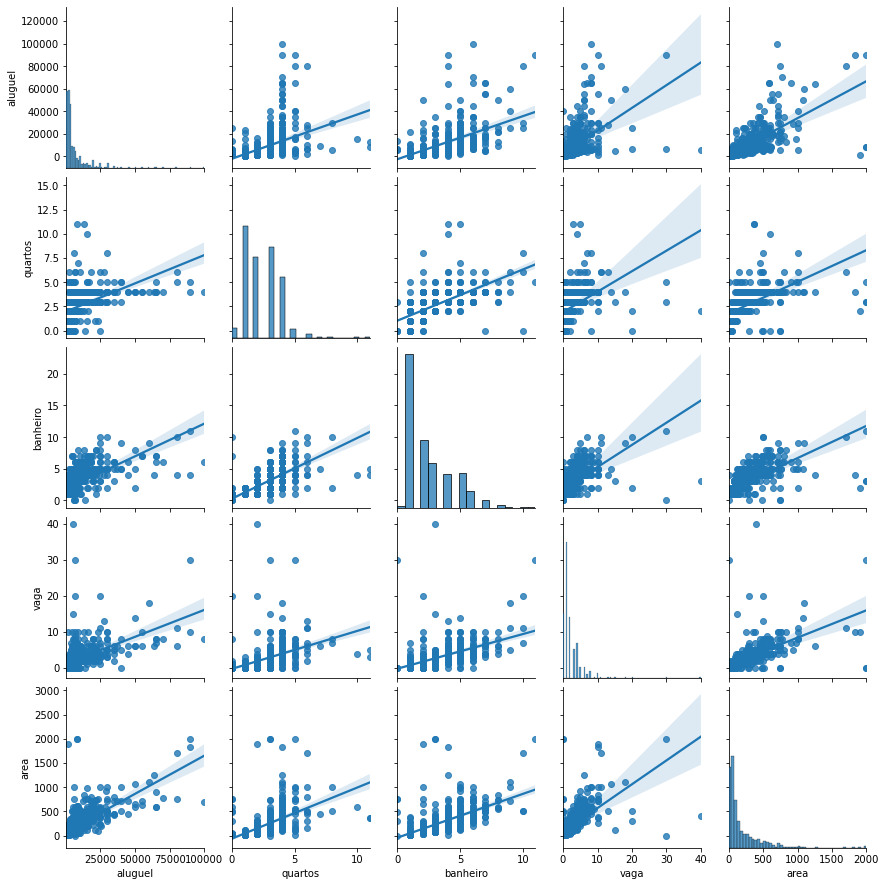

In [8]:
import seaborn as sns
sns.pairplot(train, kind='reg')

In [9]:
import numpy as np 
train['aluguel'] = train['aluguel'].apply(np.log1p)
train['area'] = train['area'].apply(np.log1p)
test['aluguel'] = test['aluguel'].apply(np.log1p)
test['area'] = test['area'].apply(np.log1p)

C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

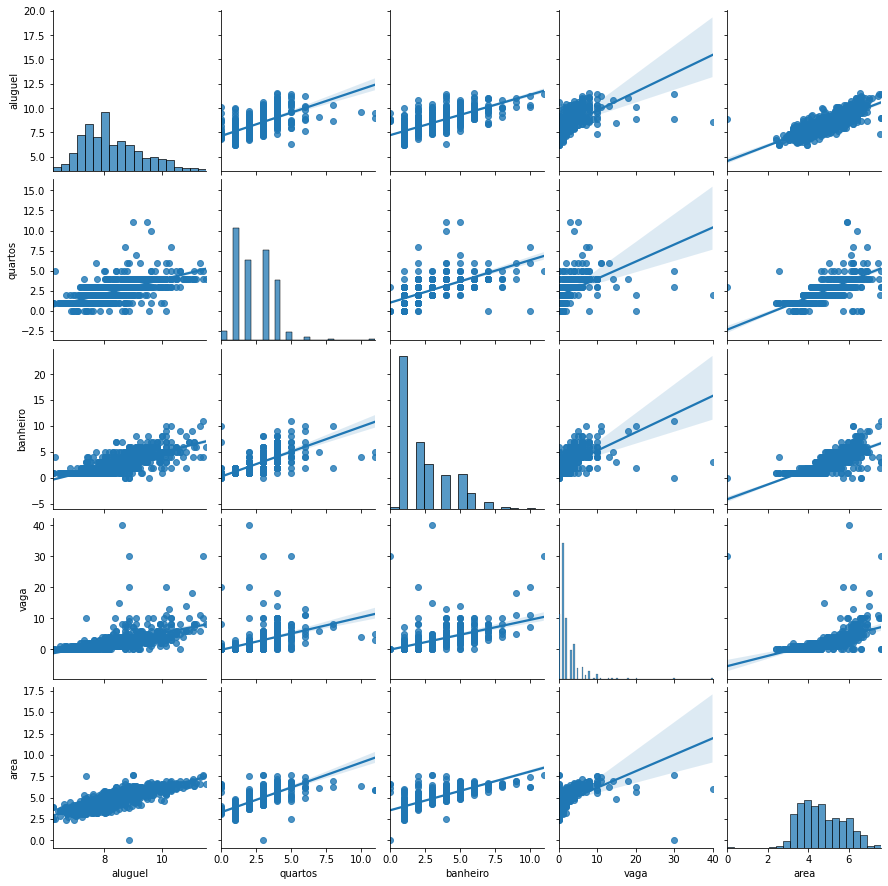

In [10]:
sns.pairplot(train, kind='reg')

In [11]:
X_cols = ['zona', 'area', 'quartos', 'banheiro', 'vaga']
y_col = ['aluguel']

In [12]:
X_train = train[X_cols]
y_train = train[y_col]
X_test = test[X_cols]
y_test = test[y_col]

In [13]:
X_train.head()

,zona,area,quartos,banheiro,vaga
975,Centro,3.637586,1.0,1.0,0.0
776,Leste,5.159055,3.0,1.0,2.0
791,Leste,3.713572,1.0,1.0,0.0
407,Sul,4.510860,3.0,3.0,1.0
650,Sul,4.615121,2.0,1.0,0.0


In [14]:
y_train.head()

,aluguel
975,6.857514
776,8.101981
791,7.003974
407,8.006701
650,7.313887


In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [16]:
X_train.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
975,3.637586,1.0,1.0,0.0,1,0,0,0,0
776,5.159055,3.0,1.0,2.0,0,1,0,0,0
791,3.713572,1.0,1.0,0.0,0,1,0,0,0
407,4.510860,3.0,3.0,1.0,0,0,0,0,1
650,4.615121,2.0,1.0,0.0,0,0,0,0,1


In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
y_pred = neigh.predict(X_test)

In [20]:
y_pred

array([[ 9.52334081],
       [10.50174081],
       [ 8.26715871],
       [ 7.91511305],
       [ 7.5323786 ],
       [ 7.70451254],
       [ 9.26865217],
       [ 9.24859096],
       [ 7.45883798],
       [ 8.18885688],
       [ 8.71459291],
       [ 7.62596685],
       [ 8.23832477],
       [ 9.04446577],
       [ 9.45370299],
       [ 6.70471013],
       [ 7.09103275],
       [ 7.11510129],
       [ 7.1704893 ],
       [ 9.28104751],
       [ 8.43945881],
       [ 8.72149244],
       [ 8.71459291],
       [ 8.47891932],
       [ 7.61192798],
       [ 7.86489809],
       [10.15497213],
       [ 6.62371223],
       [ 8.5496378 ],
       [ 7.77436082],
       [ 9.08475746],
       [ 7.28753035],
       [ 7.00226506],
       [ 6.94327953],
       [ 8.62555548],
       [10.12010183],
       [ 7.59414346],
       [ 9.03698548],
       [ 9.20906036],
       [ 9.55230319],
       [ 7.88270399],
       [ 9.16395203],
       [ 8.7017027 ],
       [ 9.32770661],
       [ 9.09018524],
       [ 8

In [21]:
y_test

,aluguel
332,9.680406
187,9.635673
278,8.609955
426,7.923348
368,8.256088
...,...
273,7.003974
97,8.779711
703,8.216358
311,7.696667


In [22]:
#RMSE
np.sqrt(np.mean((y_pred-y_test)**2))

aluguel    0.540176
dtype: float64

In [23]:
#MSE
np.mean((y_pred-y_test)**2)

aluguel    0.29179
dtype: float64

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.73642132870366

In [29]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score

In [30]:
regressor_list = [KNeighborsRegressor(),
                 LinearRegression(),
                 DecisionTreeRegressor(),
                 RandomForestRegressor(),
                 XGBRegressor(),
                 MLPRegressor(),
                 LGBMRegressor()]

In [42]:
for reg in regressor_list:
    print('Treinando', reg.__class__.__name__)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    val_score = cross_val_score(reg, X_train, y_train, cv=5)
    test_score = reg.score(X_test, y_test)
    print('Score de treino:', train_score)
    print('Scores de validação:', val_score)
    print('Score de teste:', test_score)
    print('-'*80)

Treinando KNeighborsRegressor
Score de treino: 0.8060219475267971
Scores de validação: [0.68550117 0.75033338 0.68581669 0.69518642 0.66585407]
Score de teste: 0.73642132870366
--------------------------------------------------------------------------------
Treinando LinearRegression
Score de treino: 0.7427290730695348
Scores de validação: [0.79534518 0.77598879 0.70528373 0.65025434 0.72495409]
Score de teste: 0.7556719068162427
--------------------------------------------------------------------------------
Treinando DecisionTreeRegressor
Score de treino: 0.9741022907861215
Scores de validação: [0.66750065 0.6402603  0.5485723  0.4566152  0.57499399]
Score de teste: 0.603791893573819
--------------------------------------------------------------------------------
Treinando RandomForestRegressor
Score de treino: 0.945426242163443
Scores de validação: [0.77625223 0.74014657 0.70005423 0.66722799 0.72961472]
Score de teste: 0.7828853238546588
--------------------------------------------

In [43]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = [{'learning_rate':[0.1,0.2,0.3,0.4],
              'max_depth':[2,4,5,6,7,8],
              'n_estimators':[50,100,200]}]

In [45]:
xgb = XGBRegressor(n_estimators=100, max_depth = 6)
gs = GridSearchCV(xgb, parameters, scoring='r2', n_jobs=1, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=6, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [46]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}

In [47]:
reg = gs.best_estimator_

In [48]:
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=5)
test_score = reg.score(X_test, y_test)
print('Score de treino:', train_score)
print('Scores de validação:', val_score)
print('Score de teste:', test_score)

Score de treino: 0.8663729268974202
Scores de validação: [0.79536164 0.75019349 0.7506167  0.72465035 0.75215646]
Score de teste: 0.7871725969631188


In [49]:
import pickle
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg,f)

In [51]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter = 'regressor')
all_regs=[]
for name,RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
            print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [52]:
for reg in all_regs:
    try:
        print('Treinando', reg.__class__.__name__)
        reg.fit(X_train, y_train)
        train_score = reg.score(X_train, y_train)
        val_score = cross_val_score(reg, X_train, y_train, cv=5)
        test_score = reg.score(X_test, y_test)
        print('Score de treino:', train_score)
        print('Scores de validação:', val_score)
        print('Score de teste:', test_score)
        print('-'*80)
    except Exception as e:
        print(e)

Treinando ARDRegression
Score de treino: 0.7420643848989227
Scores de validação: [0.79680235 0.77574309 0.70380453 0.65157157 0.72805275]
Score de teste: 0.7552141536939552
--------------------------------------------------------------------------------
Treinando AdaBoostRegressor
Score de treino: 0.7771631339144759
Scores de validação: [0.80338647 0.75218967 0.70604249 0.71453128 0.70817053]
Score de teste: 0.7694307841311718
--------------------------------------------------------------------------------
Treinando BaggingRegressor
Score de treino: 0.9341199755091587
Scores de validação: [0.77718704 0.7317861  0.67078084 0.62298871 0.70277033]
Score de teste: 0.7683569513803391
--------------------------------------------------------------------------------
Treinando BayesianRidge
Score de treino: 0.7426653559974732
Scores de validação: [0.79531996 0.77610417 0.70570496 0.65199313 0.72303298]
Score de teste: 0.7561014249848608
----------------------------------------------------------

Score de treino: -0.12701201178454835
Scores de validação: [ 0.05941686 -0.28621917 -0.2396725  -0.50797454  0.04294099]
Score de teste: 0.024850915014183128
--------------------------------------------------------------------------------
Treinando PLSRegression
Score de treino: 0.7256005718502929
Scores de validação: [0.77111115 0.74572622 0.6929777  0.63945782 0.70135032]
Score de teste: 0.7458173628033911
--------------------------------------------------------------------------------
Treinando PassiveAggressiveRegressor
Score de treino: 0.6469963300974506
Scores de validação: [0.24966569 0.54239382 0.16421489 0.48415658 0.66857167]
Score de teste: 0.6254296013386818
--------------------------------------------------------------------------------
Treinando PoissonRegressor
Unable to coerce to Series, length must be 1: given 823
Treinando RANSACRegressor
Score de treino: 0.6890093129241814
Scores de validação: [0.74745196 0.69051559 0.67492651 0.57706741 0.68973387]
Score de teste: 0